In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
plt.style.use(mplhep.style.CMS)

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

Welcome to JupyROOT 6.22/06
{'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}
Luminosity: 37.190432966


In [3]:
help( process_data_protons_multiRP )

Help on function process_data_protons_multiRP in module processing:

process_data_protons_multiRP(df_protons_multiRP, df_ppstracks=None, apply_fiducial=True, within_aperture=False, random_protons=False, select_2protons=True, runOnMC=False)



In [ ]:
# def get_data( fileNames ):
    
#     df_protons_multiRP_list = []
#     df_protons_singleRP_list = []
#     df_ppstracks_list = []
#     df_counts_list = []

#     for file_ in fileNames:
#         print ( file_ )
#         with h5py.File( file_, 'r' ) as f:
#             print ( list(f.keys()) )

#             dset_protons_multiRP = f['protons_multiRP']
#             print ( dset_protons_multiRP.shape )
#             print ( dset_protons_multiRP[:,:] )

#             dset_protons_singleRP = f['protons_singleRP']
#             print ( dset_protons_singleRP.shape )
#             print ( dset_protons_singleRP[:,:] )

#             dset_ppstracks = f['ppstracks']
#             print ( dset_ppstracks.shape )
#             print ( dset_ppstracks[:,:] )

#             dset_columns_protons = f['columns_protons']
#             print ( dset_columns_protons.shape )
#             columns_protons = list( dset_columns_protons )
#             print ( columns_protons )
#             columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
#             print ( columns_protons_str )

#             dset_columns_ppstracks = f['columns_ppstracks']
#             print ( dset_columns_ppstracks.shape )
#             columns_ppstracks = list( dset_columns_ppstracks )
#             print ( columns_ppstracks )
#             columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
#             print ( columns_ppstracks_str )

#             dset_selections = f['selections']
#             selections_ = [ item.decode("utf-8") for item in dset_selections ]
#             print ( selections_ )

#             dset_counts = f['event_counts']
#             df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
#             print ( df_counts_list[-1] )

#             chunk_size = 1000000
#             entries_protons_multiRP = dset_protons_multiRP.shape[0]
#             start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_multiRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_multiRP_list.append( df_ )
#                 print ( df_protons_multiRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

#             entries_protons_singleRP = dset_protons_singleRP.shape[0]
#             start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_singleRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_singleRP_list.append( df_ )
#                 print ( df_protons_singleRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

#             entries_ppstracks = dset_ppstracks.shape[0]
#             start_ = list( range( 0, entries_ppstracks, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_ppstracks )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
#                 df_ppstracks_list.append( df_ )
#                 print ( df_ppstracks_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

#     df_counts = df_counts_list[0]
#     for idx in range( 1, len( df_counts_list ) ):
#         df_counts = df_counts.add( df_counts_list[idx] )
#     print ( df_counts )

#     df_protons_multiRP = pd.concat( df_protons_multiRP_list )
#     print (df_protons_multiRP)

#     df_protons_singleRP = pd.concat( df_protons_singleRP_list )
#     print (df_protons_singleRP)

#     df_ppstracks = pd.concat( df_ppstracks_list )
#     print (df_ppstracks)
    
#     return (df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks)

In [ ]:
# run_ranges_periods = {}
# run_ranges_periods[ "2017B" ]  = (297020,299329)
# run_ranges_periods[ "2017C1" ] = (299337,300785)
# run_ranges_periods[ "2017C2" ] = (300806,302029)
# run_ranges_periods[ "2017D" ]  = (302030,303434)
# run_ranges_periods[ "2017E" ]  = (303435,304826)
# run_ranges_periods[ "2017F1" ] = (304911,305114)
# run_ranges_periods[ "2017F2" ] = (305178,305902)
# run_ranges_periods[ "2017F3" ] = (305965,306462)
# df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()

# aperture_period_map = {
#     "2016_preTS2"  : "2016_preTS2",
#     "2016_postTS2" : "2016_postTS2",
#     "2017B"        : "2017_preTS2",
#     "2017C1"       : "2017_preTS2",
#     "2017C2"       : "2017_preTS2",
#     "2017D"        : "2017_preTS2",
#     "2017E"        : "2017_postTS2",
#     "2017F1"       : "2017_postTS2",
#     "2017F2"       : "2017_postTS2",
#     "2017F3"       : "2017_postTS2",
#     "2018"         : "2018"
# }

In [ ]:
# # Per data period, arm=(0,1)
# # Periods: "2016_preTS2", "2016_postTS2", "2017_preTS2", "2017_postTS2", "2018"
# def aperture_parametrisation( period, arm, xangle, xi ):

#     #https://github.com/cms-sw/cmssw/tree/916cb3d20213734a0465240720c8c8c392b92eac/Validation/CTPPS/python/simu_config

#     if (period == "2016_preTS2"):
#         if   (arm == 0): return 3.76296E-05+((xi<0.117122)*0.00712775+(xi>=0.117122)*0.0148651)*(xi-0.117122);
#         elif (arm == 1): return 1.85954E-05+((xi<0.14324)*0.00475349+(xi>=0.14324)*0.00629514)*(xi-0.14324);
#     elif (period == "2016_postTS2"):
#         if   (arm == 0): return 6.10374E-05+((xi<0.113491)*0.00795942+(xi>=0.113491)*0.01935)*(xi-0.113491);
#         elif (arm == 1): return (xi-0.110)/130.0;
#     elif (period == "2017_preTS2"):
#         if   (arm == 0): return -(8.71198E-07*xangle-0.000134726)+((xi<(0.000264704*xangle+0.081951))*-(4.32065E-05*xangle-0.0130746)+(xi>=(0.000264704*xangle+0.081951))*-(0.000183472*xangle-0.0395241))*(xi-(0.000264704*xangle+0.081951));
#         elif (arm == 1): return 3.43116E-05+((xi<(0.000626936*xangle+0.061324))*0.00654394+(xi>=(0.000626936*xangle+0.061324))*-(0.000145164*xangle-0.0272919))*(xi-(0.000626936*xangle+0.061324));
#     elif (period == "2017_postTS2"):
#         if   (arm == 0): return -(8.92079E-07*xangle-0.000150214)+((xi<(0.000278622*xangle+0.0964383))*-(3.9541e-05*xangle-0.0115104)+(xi>=(0.000278622*xangle+0.0964383))*-(0.000108249*xangle-0.0249303))*(xi-(0.000278622*xangle+0.0964383));
#         elif (arm == 1): return 4.56961E-05+((xi<(0.00075625*xangle+0.0643361))*-(3.01107e-05*xangle-0.00985126)+(xi>=(0.00075625*xangle+0.0643361))*-(8.95437e-05*xangle-0.0169474))*(xi-(0.00075625*xangle+0.0643361));
#     elif (period == "2018"):
#         if   (arm == 0): return -(8.44219E-07*xangle-0.000100957)+((xi<(0.000247185*xangle+0.101599))*-(1.40289E-05*xangle-0.00727237)+(xi>=(0.000247185*xangle+0.101599))*-(0.000107811*xangle-0.0261867))*(xi-(0.000247185*xangle+0.101599));
#         elif (arm == 1): return -(-4.74758E-07*xangle+3.0881E-05)+((xi<(0.000727859*xangle+0.0722653))*-(2.43968E-05*xangle-0.0085461)+(xi>=(0.000727859*xangle+0.0722653))*-(7.19216E-05*xangle-0.0148267))*(xi-(0.000727859*xangle+0.0722653));
#     else:
#         return -999.

# def check_aperture( period, arm, xangle, xi, theta_x ):
#     return ( theta_x < -aperture_parametrisation( period, arm, xangle, xi ) )

In [ ]:
# def process_data_protons_multiRP( df_protons_multiRP, df_ppstracks=None, runOnMC=False ):

#     if not runOnMC:
#         df_protons_multiRP.loc[ :, "period" ] = np.nan
#         for idx_ in range( df_run_ranges.shape[0] ):
#             msk_period_ = ( ( df_protons_multiRP.loc[ :, "run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_protons_multiRP.loc[ :, "run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#             sum_period_ = np.sum( msk_period_ )
#             if sum_period_ > 0:
#                 period_key_ = df_run_ranges.index[ idx_ ]
#                 df_protons_multiRP.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#                 print ( "{}: {}".format( period_key_, sum_period_ ) )

#         df_protons_multiRP.loc[ :, "within_aperture" ] = df_protons_multiRP.apply(
#                 lambda row: check_aperture( aperture_period_map[ row["period"] ], row["arm"], 120., row["xi"], row["thx"] ), # FIXME
#                 axis=1
#                 )
    
#     df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )

#     df_ppstracks_index = None
#     if not df_ppstracks is None:
#         df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_x2" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y2" ] = np.nan
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]

#     df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
#     df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]

#     df_protons_multiRP_events.loc[ :, "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "shiftedRatioMWW_MX" ] = df_protons_multiRP_events[ "ratioMWW_MX" ] - 1.
#     df_protons_multiRP_events.loc[ :, "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
    
#     return (df_protons_multiRP_index, df_protons_multiRP_events, df_ppstracks_index)

### Signal

In [4]:
run_tables = True

labels_signals = [ "GGToWW-AQGC-A0W1e-6" ]

fileNames_signals = {
    "GGToWW-AQGC-A0W1e-6": [ "output-GGToWW-AQGC-A0W1e-6.h5" ],
    "GGToWW-AQGC-A0W2e-6": [ "output-GGToWW-AQGC-A0W2e-6.h5" ],
    "GGToWW-AQGC-A0W5e-6": [ "output-GGToWW-AQGC-A0W5e-6.h5" ]
    }

df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}

for label_ in labels_signals:
    import time
    print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
    time_s_ = time.time()

    #df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
    #df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

    if run_tables:
        with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), complevel=5 ) as store_:

            df_counts_signal_, df_protons_multiRP_signal_, df_protons_singleRP_signal_, df_ppstracks_signal_ = get_data( fileNames_signals[ label_ ] )
            df_protons_multiRP_signal_index_, df_protons_multiRP_signal_events_, df_ppstracks_signal_index_ = process_data_protons_multiRP( df_protons_multiRP_signal_, df_ppstracks_signal_, apply_fiducial=True, select_2protons=False, runOnMC=True )

            store_[ "counts" ] = df_counts_signal_
            store_[ "protons_multiRP"] = df_protons_multiRP_signal_index_
            store_[ "events_multiRP" ] = df_protons_multiRP_signal_events_
    
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
        df_counts_signals[ label_ ] = store_[ "counts" ]
        df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
        df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

    time_e_ = time.time()
    print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/25 18:51:23
output-GGToWW-AQGC-A0W1e-6.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(16714, 58)
[[ 1.0000000e+00  2.2660000e+03  2.2654900e+05 ...  7.0001221e-01
   0.0000000e+00  1.2300000e+02]
 [ 1.0000000e+00  2.2660000e+03  2.2655100e+05 ...  2.9998779e-01
   0.0000000e+00  2.3000000e+01]
 [ 1.0000000e+00  2.2660000e+03  2.2655100e+05 ... -3.5000610e-01
   0.0000000e+00  1.2300000e+02]
 ...
 [ 1.0000000e+00  9.0570000e+03  4.0563100e+05 ...  2.3500977e+00
   0.0000000e+00  1.2300000e+02]
 [ 1.0000000e+00  9.0570000e+03  4.0563500e+05 ... -1.6999512e+00
   0.0000000e+00  1.2300000e+02]
 [ 1.0000000e+00  9.0570000e+03  4.0567100e+05 ... -3.5000610e-01
   0.0000000e+00  1.2300000e+02]]
(34883, 54)
[[ 1.0000000e+00  2.2660000e+03  2.2654900e+05 ...  6.4746094e-01
   0.0000000e+00  1.0300000e+02]
 [ 1.0000000e+00  2.2660000e+03  2.2654900e+05 ...  7.0001221e-01
  

       run  lumiblock   event  slice        xi  thx       thy         t  \
0        1       2266  226549      0  0.058539  0.0 -0.000038 -0.062101   
1        1       2266  226549      0  0.060300  0.0 -0.000035 -0.051820   
2        1       2266  226551      0  0.048058  0.0 -0.000031 -0.040571   
3        1       2266  226551      0  0.048171  0.0 -0.000022 -0.022412   
4        1       2266  226551      0  0.054561  0.0  0.000016 -0.012934   
5        1       2266  226551      0  0.055136  0.0  0.000020 -0.019245   
6        1       2267  226605      0  0.144693  0.0 -0.000055 -0.131721   
7        1       2267  226605      0  0.145954  0.0 -0.000055 -0.131404   
8        1       2267  226690      0  0.031073  0.0 -0.000144 -0.848055   
9        1       2267  226690      0  0.032077  0.0 -0.000086 -0.306288   
10       1       2268  226734      0  0.132791  0.0 -0.000026 -0.042523   
11       1       2268  226734      0  0.133559  0.0 -0.000024 -0.039435   
12       1       2268  22

{'2017B': {'45': <cppyy.gbl.TH1F object at 0x846fdc0>, '56': <cppyy.gbl.TH1F object at 0x8afdda0>}, '2017C1': {'45': <cppyy.gbl.TH1F object at 0x96f0580>, '56': <cppyy.gbl.TH1F object at 0x973c090>}, '2017C2': {'45': <cppyy.gbl.TH1F object at 0x96fc170>, '56': <cppyy.gbl.TH1F object at 0x96fd0a0>}, '2017D': {'45': <cppyy.gbl.TH1F object at 0x96fec10>, '56': <cppyy.gbl.TH1F object at 0x971cba0>}, '2017E': {'45': <cppyy.gbl.TH1F object at 0x9706d90>, '56': <cppyy.gbl.TH1F object at 0x9711670>}, '2017F1': {'45': <cppyy.gbl.TH1F object at 0x970e080>, '56': <cppyy.gbl.TH1F object at 0x9737470>}, '2017F2': {'45': <cppyy.gbl.TH1F object at 0x941e9b0>, '56': <cppyy.gbl.TH1F object at 0x94a3c50>}, '2017F3': {'45': <cppyy.gbl.TH1F object at 0x9497e80>, '56': <cppyy.gbl.TH1F object at 0x9486f10>}}
{'2017B': {'45': <cppyy.gbl.TH2F object at 0x8acb2b0>, '56': <cppyy.gbl.TH2F object at 0x8afe200>}, '2017C1': {'45': <cppyy.gbl.TH2F object at 0x96f4740>, '56': <cppyy.gbl.TH2F object at 0x973c4f0>}, '2

Total time elapsed: 67


In [5]:
for label_ in labels_signals:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
        print ( list( store_ ) )

['/counts', '/events_multiRP', '/protons_multiRP']


In [6]:
label_ = "GGToWW-AQGC-A0W1e-6"
df_counts_signals[ label_ ]

All       34159
Jet       34159
Muon      17498
Proton    12552
dtype: int64

In [7]:
df_signals_protons_multiRP_index[ label_ ]

xi       thx       thy         t  ismultirp  \
run lumiblock event  slice                                                      
1   2266      226549 0      0.049396  0.000070  0.000006 -0.202391          1   
              226551 0      0.047449  0.000007  0.000021 -0.022129          1   
                     0      0.051457  0.000022  0.000089 -0.342805          1   
    2267      226605 0      0.129090  0.000042 -0.000010 -0.086362          1   
              226690 0      0.028568  0.000061 -0.000014 -0.162398          1   
    2268      226734 0      0.122175  0.000038 -0.000003 -0.068695          1   
              226716 0      0.164051 -0.000072 -0.000019 -0.226659          1   
              226773 0      0.044415 -0.000016  0.000041 -0.081292          1   
    2270      226932 0      0.032306  0.000006 -0.000075 -0.234367          1   
                     0      0.119526 -0.000012  0.000005 -0.020655          1   
    2273      227227 0      0.056667 -0.000025 -0.000072 -0.233687          1   
                     0      0.053138 -0.000011 -0.000024 -0.030825          1   
    2274      227321 0      0.082597  0.000042 -0.000018 -0.086781          1   
              227328 0      0.141799 -0.000062  0.000005 -0.161479          1   
              227324 0      0.057238 -0.000019  0.000045 -0.099979          1   
    2275      227457 0      0.068920 -0.000051  0.000024 -0.129756          1   
                     0      0.115064  0.000022  0.000018 -0.042887          1   
    2276      227546 0      0.090561 -0.000041  0.000076 -0.292089          1   
                     0      0.125299 -0.000021  0.000054 -0.142210          1   
              227579 0      0.118551 -0.000022 -0.000012 -0.037683          1   
                     0      0.169634 -0.000121 -0.000032 -0.583498          1   
    2277      227611 0      0.037509  0.000041  0.000004 -0.071968          1   
              227610 0      0.088627 -0.000125 -0.000004 -0.614065          1   
              227661 0      0.057884  0.000036  0.000051 -0.158605          1   
    2278      227745 0      0.084094 -0.000080 -0.000087 -0.548091          1   
    2279      227825 0      0.067304 -0.000003  0.000013 -0.011687          1   
              227868 0      0.062334  0.000017  0.000011 -0.020236          1   
    2280      227969 0      0.085506  0.000025  0.000011 -0.035329          1   
    2281      228042 0      0.105618  0.000070  0.000014 -0.202386          1   
                     0      0.128394  0.000116  0.000039 -0.572105          1   
...                              ...       ...       ...       ...        ...   
    9019      401874 0      0.033579 -0.000103 -0.000091 -0.770512          1   
                     0      0.084197  0.000007  0.000073 -0.213555          1   
    9021      402066 0      0.036611  0.000072  0.000042 -0.282051          1   
                     0      0.046874  0.000018  0.000021 -0.032829          1   
              402070 0      0.042629  0.000002  0.000039 -0.065000          1   
              402092 0      0.102647 -0.000046  0.000074 -0.302056          1   
    9024      402306 0      0.101640  0.000058  0.000090 -0.444098          1   
              402311 0      0.108578 -0.000074  0.000040 -0.278426          1   
              402331 0      0.107441  0.000044  0.000004 -0.084092          1   
              402381 0      0.100368 -0.000052 -0.000037 -0.163561          1   
    9026      402504 0      0.041278  0.000096 -0.000116 -0.922533          1   
    9039      403821 0      0.102213  0.000027  0.000032 -0.076706          1   
    9041      404017 0      0.057910 -0.000056 -0.000008 -0.129058          1   
              404092 0      0.075079  0.000072 -0.000071 -0.400480          1   
              404091 0      0.132769 -0.000061  0.000051 -0.246764          1   
    9042      404200 0      0.089057  0.000003  0.000123 -0.593795          1   
    9043      404249 0      0.099805  0.000084  0.000034 -0.32098

In [8]:
df_signals_protons_multiRP_index[ label_ ][ [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2" ] ]

xi       thx       thy         t  ismultirp  \
run lumiblock event  slice                                                      
1   2266      226549 0      0.049396  0.000070  0.000006 -0.202391          1   
              226551 0      0.047449  0.000007  0.000021 -0.022129          1   
                     0      0.051457  0.000022  0.000089 -0.342805          1   
    2267      226605 0      0.129090  0.000042 -0.000010 -0.086362          1   
              226690 0      0.028568  0.000061 -0.000014 -0.162398          1   
    2268      226734 0      0.122175  0.000038 -0.000003 -0.068695          1   
              226716 0      0.164051 -0.000072 -0.000019 -0.226659          1   
              226773 0      0.044415 -0.000016  0.000041 -0.081292          1   
    2270      226932 0      0.032306  0.000006 -0.000075 -0.234367          1   
                     0      0.119526 -0.000012  0.000005 -0.020655          1   
    2273      227227 0      0.056667 -0.000025 -0.000072 -0.233687          1   
                     0      0.053138 -0.000011 -0.000024 -0.030825          1   
    2274      227321 0      0.082597  0.000042 -0.000018 -0.086781          1   
              227328 0      0.141799 -0.000062  0.000005 -0.161479          1   
              227324 0      0.057238 -0.000019  0.000045 -0.099979          1   
    2275      227457 0      0.068920 -0.000051  0.000024 -0.129756          1   
                     0      0.115064  0.000022  0.000018 -0.042887          1   
    2276      227546 0      0.090561 -0.000041  0.000076 -0.292089          1   
                     0      0.125299 -0.000021  0.000054 -0.142210          1   
              227579 0      0.118551 -0.000022 -0.000012 -0.037683          1   
                     0      0.169634 -0.000121 -0.000032 -0.583498          1   
    2277      227611 0      0.037509  0.000041  0.000004 -0.071968          1   
              227610 0      0.088627 -0.000125 -0.000004 -0.614065          1   
              227661 0      0.057884  0.000036  0.000051 -0.158605          1   
    2278      227745 0      0.084094 -0.000080 -0.000087 -0.548091          1   
    2279      227825 0      0.067304 -0.000003  0.000013 -0.011687          1   
              227868 0      0.062334  0.000017  0.000011 -0.020236          1   
    2280      227969 0      0.085506  0.000025  0.000011 -0.035329          1   
    2281      228042 0      0.105618  0.000070  0.000014 -0.202386          1   
                     0      0.128394  0.000116  0.000039 -0.572105          1   
...                              ...       ...       ...       ...        ...   
    9019      401874 0      0.033579 -0.000103 -0.000091 -0.770512          1   
                     0      0.084197  0.000007  0.000073 -0.213555          1   
    9021      402066 0      0.036611  0.000072  0.000042 -0.282051          1   
                     0      0.046874  0.000018  0.000021 -0.032829          1   
              402070 0      0.042629  0.000002  0.000039 -0.065000          1   
              402092 0      0.102647 -0.000046  0.000074 -0.302056          1   
    9024      402306 0      0.101640  0.000058  0.000090 -0.444098          1   
              402311 0      0.108578 -0.000074  0.000040 -0.278426          1   
              402331 0      0.107441  0.000044  0.000004 -0.084092          1   
              402381 0      0.100368 -0.000052 -0.000037 -0.163561          1   
    9026      402504 0      0.041278  0.000096 -0.000116 -0.922533          1   
    9039      403821 0      0.102213  0.000027  0.000032 -0.076706          1   
    9041      404017 0      0.057910 -0.000056 -0.000008 -0.129058          1   
              404092 0      0.075079  0.000072 -0.000071 -0.400480          1   
              404091 0      0.132769 -0.000061  0.000051 -0.246764          1   
    9042      404200 0      0.089057  0.000003  0.000123 -0.593795          1   
    9043      404249 0      0.099805  0.000084  0.000034 -0.32098

In [9]:
msk_columns_eff_ = [ key_[:len('eff')] == 'eff' for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_eff_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_eff_ ]
df_signals_protons_multiRP_index[ label_ ][ columns_eff_ ]

eff_proton_all_weighted  eff_all_weighted  \
run lumiblock event  slice                                              
1   2266      226549 0                     0.781394          0.420107   
              226551 0                     0.586022          0.339100   
                     0                     0.766416          0.413233   
    2267      226605 0                     0.847601          0.456224   
              226690 0                     0.098944          0.062731   
    2268      226734 0                     0.675831          0.389270   
              226716 0                     0.804625          0.432995   
              226773 0                     0.399961          0.238081   
    2270      226932 0                     0.357664          0.218844   
                     0                     0.794345          0.427809   
    2273      227227 0                     0.589138          0.340731   
                     0                     0.752953          0.405743   
    2274      227321 0                     0.796051          0.428444   
              227328 0                     0.804526          0.432948   
              227324 0                     0.460361          0.266905   
    2275      227457 0                     0.586721          0.339407   
                     0                     0.800600          0.430894   
    2276      227546 0                     0.593813          0.343356   
                     0                     0.794542          0.428177   
              227579 0                     0.680857          0.392048   
                     0                     0.800359          0.431079   
    2277      227611 0                     0.392914          0.237215   
              227610 0                     0.585389          0.338342   
              227661 0                     0.591308          0.341954   
    2278      227745 0                     0.571797          0.330662   
    2279      227825 0                     0.593143          0.343168   
              227868 0                     0.779955          0.419346   
    2280      227969 0                     0.678655          0.390545   
    2281      228042 0                     0.677277          0.390281   
                     0                     0.500317          0.251885   
...                                             ...               ...   
    9019      401874 0                     0.418423          0.246845   
                     0                     0.786400          0.423546   
    9021      402066 0                     0.588951          0.340693   
                     0                     0.703356          0.382688   
              402070 0                     0.591781          0.342179   
              402092 0                     0.678528          0.390239   
    9024      402306 0                     0.677696          0.390032   
              402311 0                     0.605984          0.350445   
              402331 0                     0.799224          0.430277   
              402381 0                     0.605636          0.350249   
    9026      402504 0                     0.569803          0.329689   
    9039      403821 0                     0.795206          0.428189   
    9041      404017 0                     0.587636          0.339857   
              404092 0                     0.795819          0.428184   
              404091 0                     0.789418          0.425175   
    9042      404200 0                     0.621535          0.358612   
    9043      404249 0                     0.676117          0.389539   
                     0                     0.843541          0.453754   
    9049      404804 0                     0.680919          0.391967   
              404867 0                     0.819940          0.441073   
              404859 0                     0.786477          0.423226   
              404880 0                     0.581081          0.336158   
    9050     

In [10]:
df_protons_multiRP_groupby = df_signals_protons_multiRP_index[ label_ ][ [ "arm" ] ].groupby( ["run","lumiblock","event","slice"] )
msk_2protons = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) >= 1 ) )
msk_1proton_Arm0 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) == 0 ) )
msk_1proton_Arm1 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 0 ) & ( np.sum( s_ == 1 ) >= 1 ) )
print ( msk_2protons )
print ( msk_1proton_Arm0 )
print ( msk_1proton_Arm1 )

run  lumiblock  event   slice
1    2266       226549  0        False
                226551  0         True
                        0         True
     2267       226605  0        False
                226690  0        False
     2268       226734  0        False
                226716  0        False
                226773  0        False
     2270       226932  0         True
                        0         True
     2273       227227  0         True
                        0         True
     2274       227321  0        False
                227328  0        False
                227324  0        False
     2275       227457  0         True
                        0         True
     2276       227546  0         True
                        0         True
                227579  0         True
                        0         True
     2277       227611  0        False
                227610  0        False
                227661  0        False
     2278       227745  0        F

In [11]:
# df_signals_protons_multiRP_index[ label_ ][ msk_2protons ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm0 ]
df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm1 ]

xi       thx           thy         t  \
run lumiblock event  slice                                               
1   2266      226549 0      0.049396  0.000070  5.573294e-06 -0.202391   
    2267      226605 0      0.129090  0.000042 -9.561671e-06 -0.086362   
    2268      226716 0      0.164051 -0.000072 -1.936938e-05 -0.226659   
    2274      227321 0      0.082597  0.000042 -1.787059e-05 -0.086781   
              227328 0      0.141799 -0.000062  4.827880e-06 -0.161479   
              227324 0      0.057238 -0.000019  4.545151e-05 -0.099979   
    2279      227868 0      0.062334  0.000017  1.107882e-05 -0.020236   
    2282      228121 0      0.100883 -0.000009 -4.393020e-05 -0.086406   
              228194 0      0.075288  0.000121  2.651756e-05 -0.602996   
    2283      228221 0      0.037842  0.000020  1.378915e-05 -0.025514   
    2284      228335 0      0.129740  0.000070  8.168883e-05 -0.443944   
    2294      229378 0      0.108844  0.000036  6.870371e-05 -0.237796   
    2296      229571 0      0.037841  0.000020  4.534777e-05 -0.101401   
    2299      229898 0      0.103075 -0.000015  6.839736e-05 -0.196214   
    2300      229953 0      0.060977 -0.000054  3.521776e-05 -0.168079   
    2304      230306 0      0.131520  0.000044  1.108198e-04 -0.539869   
    2305      230443 0      0.089743  0.000033 -6.768740e-05 -0.226631   
              230495 0      0.047808 -0.000033 -2.902901e-06 -0.045471   
    2308      230705 0      0.056901 -0.000049 -1.649424e-05 -0.109835   
              230740 0      0.047246  0.000003 -2.686510e-04 -2.907677   
    2310      230976 0      0.056372 -0.000012  5.037844e-05 -0.109459   
    2311      231007 0      0.123299  0.000006  4.472932e-05 -0.090658   
    2315      231473 0      0.161565 -0.000088  1.115588e-04 -0.741070   
    2316      231515 0      0.080627  0.000044 -8.201694e-05 -0.342203   
              231509 0      0.042524 -0.000029 -8.453837e-07 -0.036805   
              231559 0      0.079601  0.000026  9.164276e-05 -0.359311   
              231594 0      0.163947 -0.000135  6.941914e-06 -0.670656   
    2319      231860 0      0.097004 -0.000012 -3.483900e-06 -0.015071   
    2322      232107 0      0.134608 -0.000066  8.022647e-05 -0.414646   
    2323      232220 0      0.170070 -0.000189  2.539491e-05 -1.303906   
...                              ...       ...           ...       ...   
    6505      150469 0      0.133178  0.000012 -2.047188e-05 -0.039070   
    6486      148548 0      0.102140  0.000015  1.608771e-06 -0.018846   
    6465      146406 0      0.136299  0.000016  6.637946e-05 -0.189048   
              146497 0      0.115042  0.000071  8.152697e-05 -0.447873   
    6468      146745 0      0.132762  0.000049  4.208773e-05 -0.169881   
              146755 0      0.100209 -0.000023  1.990362e-05 -0.044611   
    6469      146827 0      0.092359  0.000018  4.540781e-05 -0.100275   
    6474      147335 0      0.088579  0.000006 -2.967883e-05 -0.043057   
              147379 0      0.062977 -0.000094  7.565684e-05 -0.577734   
    6484      148363 0      0.068993 -0.000026  7.775802e-05 -0.268943   
    6485      148442 0      0.088075 -0.000095 -2.668424e-05 -0.379770   
    6548      154790 0      0.117037  0.000092  3.655073e-05 -0.381086   
    6556      155543 0      0.134677  0.000049 -1.118579e-05 -0.112086   
              155581 0      0.095447 -0.000004 -7.263018e-05 -0.211212   
    9088      408769 0      0.106919  0.000033  6.906826e-06 -0.055162   
    9014      401316 0      0.119199  0.000168  1.001779e-04 -1.435228   
    9015      401494 0      0.066395 -0.000090 -9.678808e-05 -0.694528   
    9017      401681 0      0.075163  0.000018  2.833465e-06 -0.018004   
    9018      401784 0      0.117140  0.000047  6.548151e-05 -0.255628   
    9024      402331 0      0.107441  0.000044  4.158548e-06 -0.084092   
    9039      403821 0      0.102213  0.000027  3.204241e-05 -0.076706   
    9041      404092 0      0.075079  

In [12]:
df_signals_protons_multiRP_events[ label_ ]

random     jet0_pt  jet0_eta  jet0_phi  \
run lumiblock event  slice                                           
1   2266      226551 0           0  203.932037 -1.086163  0.536344   
    2270      226932 0           0  320.698212 -1.370161 -1.832831   
    2273      227227 0           0  335.731934  0.259870 -3.108820   
    2275      227457 0           0  345.850189 -1.458291  3.099098   
    2276      227546 0           0  608.518616 -0.521754 -0.481351   
              227579 0           0  819.906433  0.347934  1.723913   
    2281      228042 0           0  764.408875 -0.631614  2.295349   
    2282      228117 0           0  321.463196  0.091370 -2.196248   
    2286      228503 0           0  649.005920 -0.110481  1.066668   
              228565 0           0  360.785767  0.943119 -1.373860   
    2289      228803 0           0  553.738098 -0.434034  1.881415   
    2291      229042 0           0  226.409943 -1.545674 -2.217598   
    2296      229520 0           0  359.400543  1.004407  1.754919   
    2297      229605 0           0  314.089844 -0.833665  2.804024   
    2298      229715 0           0  303.292603 -0.605599  1.378168   
    2299      229845 0           0  477.458221  0.370481  2.630056   
              229840 0           0  320.155548 -1.622710  1.047925   
    2301      230059 0           0  441.006378  0.965674 -0.766519   
    2302      230119 0           0  798.193726  0.189021 -1.469288   
              230195 0           0  544.700195  1.061919  1.596644   
              230185 0           0  428.253479  0.875721 -2.115956   
    2305      230479 0           0  711.671204 -0.083028 -2.544181   
    2316      231571 0           0  304.978241 -1.147173  1.442453   
    2320      231972 0           0  776.558167 -0.373183  1.715490   
    2321      232050 0           0  288.986633 -0.175954 -0.479072   
    2325      232498 0           0  251.262024 -0.020143  0.202985   
    2326      232588 0           0  219.488464  1.728025  0.155746   
    2339      233842 0           0  356.559387 -0.401219 -1.865776   
    2348      234737 0           0  896.576538 -0.601894 -3.071452   
    2351      235039 0           0  399.303131  0.779830  1.361783   
...                            ...         ...       ...       ...   
    6217      121637 0           0  215.106949 -2.021043  1.333552   
    6229      122879 0           0  532.137878  0.928207  1.712423   
    6230      122966 0           0  284.843292 -0.112785 -1.573483   
    6235      123409 0           0  584.494629 -0.626971  2.628369   
              123449 0           0  565.342529 -0.246432 -1.963999   
    6236      123509 0           0  215.110748  0.533007 -2.360625   
    6237      123616 0           0  264.498840  0.536307 -2.739888   
    6243      124217 0           0  601.605652  0.171271 -0.948435   
    6245      124442 0           0  304.889465 -1.116777 -2.110954   
              124479 0           0  632.597717 -0.139025 -0.905077   
    6248      124750 0           0  310.905151  0.663816  2.997675   
    6251      125087 0           0  410.933594  1.072456 -0.421513   
    6252      125109 0           0  411.727661 -0.547556 -2.763749   
              125137 0           0  318.394104  0.175385  2.942288   
    6253      125242 0           0  710.798523 -0.403292 -0.490260   
    6255      125430 0           0  259.293335  0.715522 -1.694036   
    6469      146862 0           0  210.521988  0.921746  3.116857   
              146890 0           0  912.886047 -0.165786 -1.329402   
    6470      146958 0           0  376.436188 -0.009431 -2.443810   
              146970 0           0  780.598083 -0.361079  2.944136   
    6534      153363 0           0  889.999207 -0.203760  2.090625   
    6552      155161 0           0  386.200836  0.068852 -2.370285   
    6547      154620 0           0  226.073822  0.920938  2.945690   
    6554      155360 0           0  372.651367 -1.322420  1.526582   
    9014      401359 0           0  33

7236 8356


Text(0, 1, 'Y (mm)')

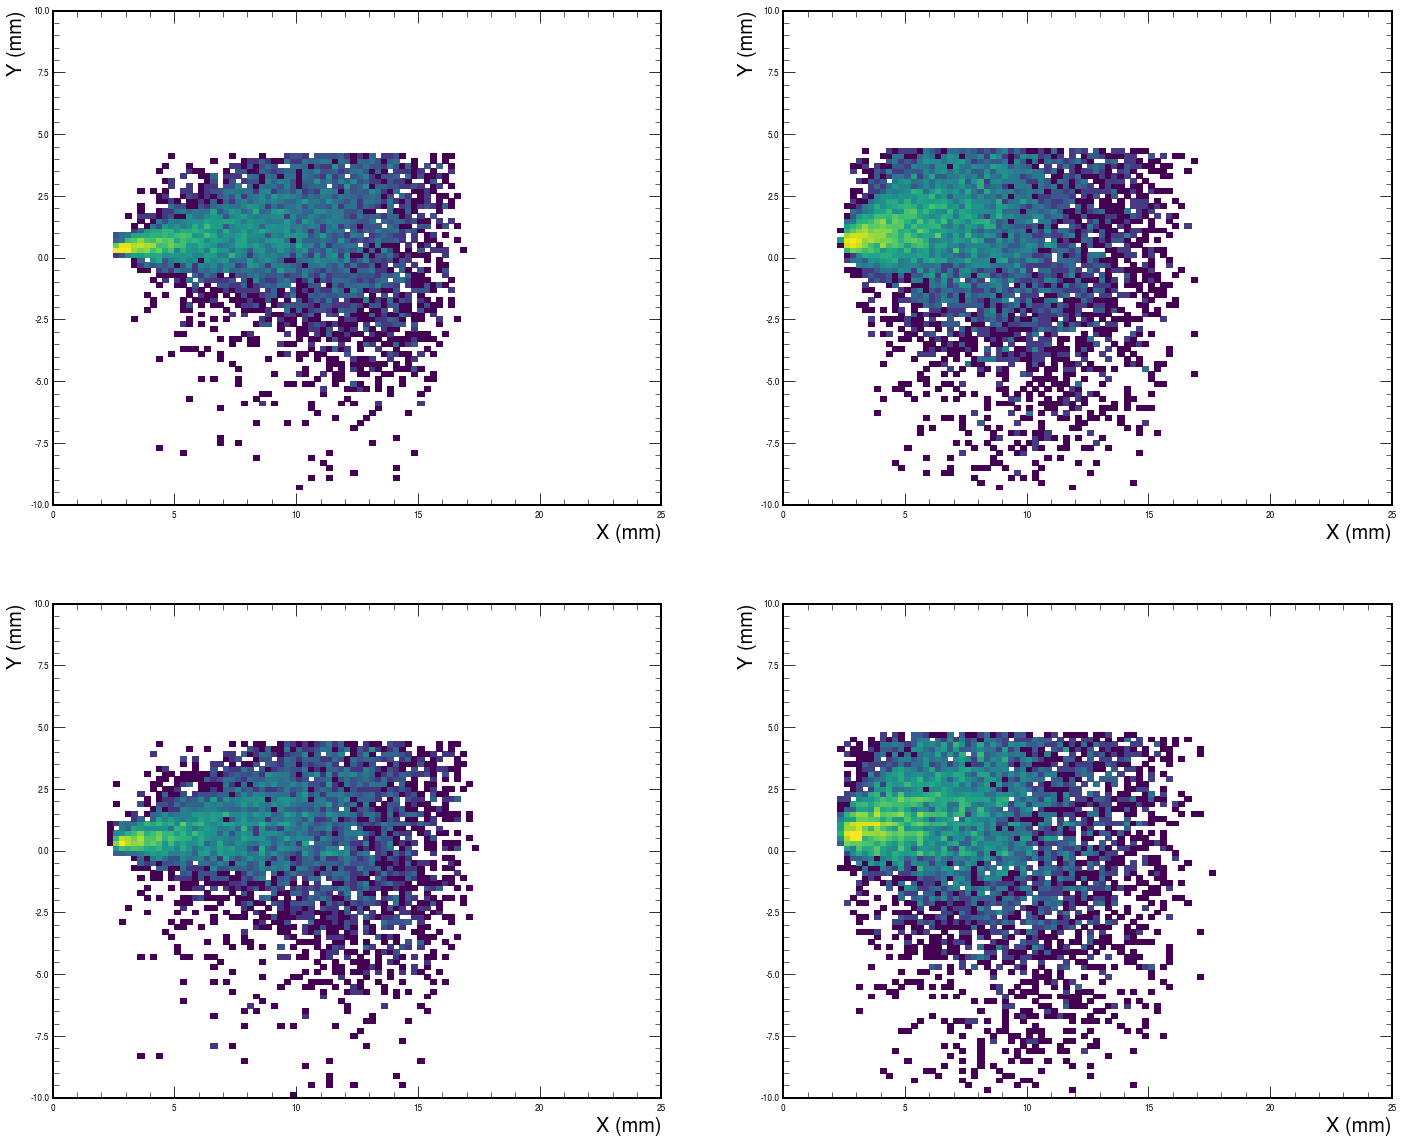

In [13]:
label_ = "GGToWW-AQGC-A0W1e-6"
df_protons_multiRP_signal_index_ = df_signals_protons_multiRP_index[ label_ ]

msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

7236 8356


<ipython-input-14-c4e373e684d2>:12: RuntimeWarning: invalid value encountered in true_divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
<ipython-input-14-c4e373e684d2>:18: RuntimeWarning: invalid value encountered in true_divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


Text(0, 1, '$\\theta_x^{\\ast}$')

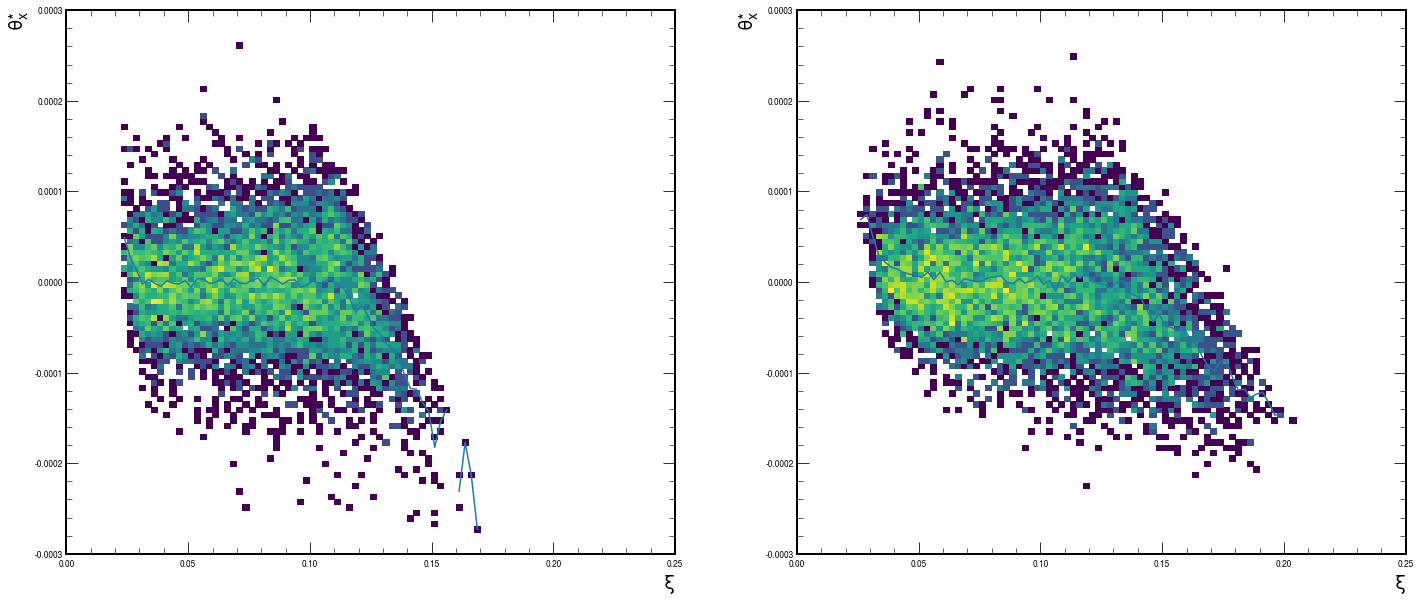

In [14]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk1 ], df_protons_multiRP_signal_index_[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk2 ], df_protons_multiRP_signal_index_[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

### Background

In [ ]:
run_tables = True

resample_factor = 20
label = "data-random-resample_20"

fileNames_bkg = [
    "output-data-random-resample_20-2017B.h5",
    "output-data-random-resample_20-2017C.h5",
    "output-data-random-resample_20-2017D.h5",
    "output-data-random-resample_20-2017E.h5",
    "output-data-random-resample_20-2017F.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = 4 * [None]
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:
        df_counts_bkg_list_ = []
        df_protons_multiRP_bkg_index_list_ = []
        df_protons_multiRP_bkg_events_list_ = []
        df_ppstracks_bkg_index_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_protons_multiRP_bkg_, df_protons_singleRP_bkg_, df_ppstracks_bkg_ = get_data( [ file_ ] )
            df_protons_multiRP_bkg_index_, df_protons_multiRP_bkg_events_, df_ppstracks_bkg_index_ = process_data_protons_multiRP( df_protons_multiRP_bkg_, df_ppstracks_bkg_, apply_fiducial=True, within_aperture=True, random_protons=True, runOnMC=False )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index_ )
            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_ )
            df_ppstracks_bkg_index_list_.append( df_ppstracks_bkg_index_ )
            
        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[ idx_ ] )

        df_protons_multiRP_bkg_index_ = pd.concat( df_protons_multiRP_bkg_index_list_ )
        df_protons_multiRP_bkg_events_ = pd.concat( df_protons_multiRP_bkg_events_list_ )
        df_ppstracks_bkg_index_ = pd.concat( df_ppstracks_bkg_index_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "protons_multiRP"] = df_protons_multiRP_bkg_index_
        store_[ "events_multiRP" ] = df_protons_multiRP_bkg_events_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/25 18:54:57
output-data-random-resample_20-2017B.h5
['columns_ppstracks', 'columns_protons_multiRP', 'columns_protons_singleRP', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(612700, 61)
[[2.9705000e+05 5.6000000e+01 6.8400744e+07 ... 7.7001953e-01
  0.0000000e+00 1.2300000e+02]
 [2.9705000e+05 3.7700000e+02 4.7180662e+08 ... 3.2766113e+00
  0.0000000e+00 2.3000000e+01]
 [2.9710100e+05 2.1600000e+02 3.0310742e+08 ... 3.7736816e+00
  0.0000000e+00 1.2300000e+02]
 ...
 [2.9729200e+05 4.7200000e+02 8.5325037e+08 ... 3.8579102e+00
  0.0000000e+00 1.2300000e+02]
 [2.9729200e+05 4.7200000e+02 8.5165843e+08 ... 1.0638428e+00
  0.0000000e+00 1.2300000e+02]
 [2.9729200e+05 6.8800000e+02 1.2311988e+09 ... 1.0935059e+00
  0.0000000e+00 2.3000000e+01]]
(1669300, 57)
[[ 2.9705000e+05  5.6000000e+01  6.8400744e+07 ...  6.9183350e-01
   0.0000000e+00  1.0300000e+02]
 [ 2.9705000e+05  5.6000000e+01  6.8400744e+07 ...  7.7001953e-01
   0.0000000e+00  1.23000

      run  lumiblock      event  slice         x         y  rpid  run_rnd  \
0  297050         56   68400744      0  3.289185  0.691833   103   297219   
1  297050         56   68400744      0  3.021942  0.770020   123   297219   
2  297050        377  471806624      0  7.817871  3.025391     3   297114   
3  297050        377  471806624      0  7.802368  3.276611    23   297114   
4  297050        377  471806624      0  9.324829 -6.505859    23   297114   

   lumiblock_rnd   event_rnd  
0            685  1267538816  
1            685  1267538816  
2            120   207214752  
3            120   207214752  
4            120   207214752  
Data set size: 1000000
1000000 1955320
      run  lumiblock      event  slice         x         y  rpid  run_rnd  \
0  297057        117  160204064     15  9.626465  1.783936   103   297219   
1  297057        117  160204064     15  9.721924  1.898560   123   297219   
2  297057        117  159734256     15  3.945801  1.159668     3   297057   
3  2

           run  lumiblock       event  slice        xi  thx       thy  \
0       297050         56    68400744      0  0.044322  0.0 -0.000072   
1       297050         56    68400744      0  0.041310  0.0 -0.000077   
2       297050        377   471806624      0  0.078212  0.0 -0.000111   
3       297050        377   471806624      0  0.077604  0.0 -0.000112   
4       297050        377   471806624      0  0.090706  0.0  0.000176   
5       297050        377   471806624      0  0.153477  0.0 -0.000044   
6       297101        216   303107424      0  0.104091  0.0 -0.000008   
7       297101        216   303107424      0  0.110326  0.0 -0.000058   
8       297101        216   303107424      0  0.122800  0.0  0.000179   
9       297101        216   303107424      0  0.169926  0.0  0.000029   
10      297101        216   303107424      0  0.126536  0.0 -0.000063   
11      297101        216   303107424      0  0.126009  0.0 -0.000063   
12      297101        216   303382496      0  0.115

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


 {'2017B': {0: {2: 24.479}, 1: {2: 24.62}}, '2017C1': {0: {2: 24.334}, 1: {2: 24.62}}, '2017E': {0: {2: 24.479}, 1: {2: 24.62}}, '2017F1': {0: {2: 24.479}, 1: {2: 24.62}}, '2018A': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.498, 2: 20.045}}, '2018B1': {0: {0: 17.927, 2: 24.62}, 1: {0: 18.07, 2: 20.045}}, '2018B2': {0: {0: 17.64, 2: 24.479}, 1: {0: 17.931, 2: 24.76}}, '2018C': {0: {0: 17.93, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}, '2018D1': {0: {0: 17.931, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}, '2018D2': {0: {0: 17.931, 2: 24.62}, 1: {0: 17.931, 2: 24.76}}} {'2017B': {0: {2: -11.098}, 1: {2: -10.698}}, '2017C1': {0: {2: -11.098}, 1: {2: -10.698}}, '2017E': {0: {2: -10.098}, 1: {2: -9.698}}, '2017F1': {0: {2: -10.098}, 1: {2: -9.698}}, '2018A': {0: {0: -11.598, 2: -10.898}, 1: {0: -11.298, 2: -10.398}}, '2018B1': {0: {0: -11.598, 2: -10.898}, 1: {0: -11.198, 2: -10.398}}, '2018B2': {0: {0: -11.598, 2: -11.398}, 1: {0: -10.498, 2: -10.598}}, '2018C': {0: {0: -11.098, 2: -11.398}, 1: {0: -10.498, 2

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


['xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 'trackx1', 'tracky1', 'trackpixshift1', 'rpid1', 'trackx2', 'tracky2', 'trackpixshift2', 'rpid2']
run     lumiblock  event       slice
297050  56         68400744    0        False
        377        471806624   0        False
297101  216        303107424   0        False
                   303382496   0        False
                   303018464   0        False
                   302550016   0         True
                               0         True
        264        366620512   0        False
                   366944960   0        False
                   366741440   0        False
                   366899584   0        False
                   367064000   0        False
                   366892832   0        False
        489        649856256   0        False
                   649862784   0        False
                   649874048   0        False
                   649481472   0        False
                   649359936 

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/async_helpers.py:67: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


run     lumiblock  event       slice
297101  216        302550016   0         991.082153
297292  87         162028576   0         740.213928
297050  23         23347598    0         686.472717
        65         78788008    0        1188.718994
        499        605989248   0         585.438477
297411  315        507722016   0        1281.273071
        377        608603776   0         533.259521
297177  103        155861312   0         835.258789
        112        168879968   0         662.516785
297057  359        451236608   0        1477.063232
297219  2173       3099827968  0        1283.559326
                   3099778304  0        1190.692749
                   3100205568  0         857.619751
297425  58         92710800    0        1039.189087
297050  640        759692672   0         733.031860
        658        778318912   0         897.606995
        633        752294720   0         834.609375
                   752405312   0         832.814880
        635        75430041

[[ 2.9948000e+05  2.1700000e+02  3.1724195e+08 ...  2.3934937e-01
   0.0000000e+00  2.3000000e+01]
 [ 2.9948000e+05  2.1700000e+02  3.1724195e+08 ... -2.4296570e-01
   0.0000000e+00  1.2300000e+02]
 [ 2.9948000e+05  2.1700000e+02  3.1693184e+08 ...  1.3930664e+00
   0.0000000e+00  2.3000000e+01]
 ...
 [ 3.0202900e+05  2.6000000e+01  3.4166756e+07 ...  1.2725830e+00
   0.0000000e+00  1.2300000e+02]
 [ 3.0202900e+05  7.9000000e+01  9.7355424e+07 ... -1.0407715e+00
   0.0000000e+00  2.3000000e+01]
 [ 3.0202900e+05  7.9000000e+01  9.8279936e+07 ...  1.2385254e+00
   0.0000000e+00  2.3000000e+01]]
(7496200, 57)
[[ 2.9948000e+05  2.1700000e+02  3.1724195e+08 ...  1.9784546e-01
   0.0000000e+00  3.0000000e+00]
 [ 2.9948000e+05  2.1700000e+02  3.1724195e+08 ...  2.3934937e-01
   0.0000000e+00  2.3000000e+01]
 [ 2.9948000e+05  2.1700000e+02  3.1724195e+08 ... -1.7439270e-01
   0.0000000e+00  1.0300000e+02]
 ...
 [ 3.0202900e+05  7.9000000e+01  9.8279936e+07 ...  1.2385254e+00
   0.0000000e+00  

      run  lumiblock      event  slice        xi  thx       thy         t  \
0  300226        256  331303840     15  0.059416  0.0  0.000172 -1.178675   
1  300226        425  591004736     15  0.120339  0.0 -0.000054 -0.123205   
2  300226        425  591004736     15  0.074389  0.0 -0.000171 -1.152907   
3  300226        425  591004736     15  0.078481  0.0 -0.000065 -0.171834   
4  300226        425  591004736     15  0.110222  0.0 -0.000083 -0.268559   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0    23  ...           1.0                  -999.0 -8.261000e+36   
1          0   103  ...           1.0                  -999.0 -8.261000e+36   
2          0   123  ...           1.0                  -999.0 -8.261000e+36   
3          0   123  ...           1.0                  -999.0 -8.261000e+36   
4          0   123  ...           1.0                  -999.0 -8.261000e+36   

   run_rnd  lumiblock_rnd  event_rnd   trackx1   tracky1  trac

      run  lumiblock      event  slice        xi  thx       thy         t  \
0  301987        240  184930944      6  0.044265  0.0 -0.000062 -0.155977   
1  301987        719  511681984      6  0.047180  0.0 -0.000028 -0.033292   
2  301987        719  511681984      6  0.027257  0.0 -0.000067 -0.184830   
3  301987        719  511681984      6  0.047171  0.0 -0.000029 -0.035827   
4  301987        719  511739168      6  0.094775  0.0 -0.000067 -0.178474   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0   123  ...           1.0                  -999.0  2.721322e-42   
1          0     3  ...           1.0                  -999.0  2.721322e-42   
2          0    23  ...           1.0                  -999.0  2.721322e-42   
3          0    23  ...           1.0                  -999.0  2.721322e-42   
4          0     3  ...           1.0                  -999.0  2.721322e-42   

   run_rnd  lumiblock_rnd   event_rnd   trackx1   tracky1  tra

      run  lumiblock      event  slice         x         y  rpid  run_rnd  \
0  301998        518  481945376     15  7.578430  0.803711    23   301970   
1  301998        518  481945376     15  2.069214 -0.353729   123   301970   
2  301998        518  481945376     15  2.386963 -1.380249   123   301970   
3  301998        518  481945376     15  2.573120  4.029297   123   301970   
4  301998        518  481945376     15  4.145508  0.863586   123   301970   

   lumiblock_rnd  event_rnd  
0             82   93838200  
1             82   93838200  
2             82   93838200  
3             82   93838200  
4             82   93838200  
Data set size: 191640
All          5511560
Jet          5511560
Muon         5412340
ProtonRnd    2296060
dtype: int64
           run  lumiblock      event  slice        xi           thx       thy  \
0       299480        217  317241952      0  0.041068  7.333631e-05 -0.000023   
1       299480        217  317241952      0  0.053938 -7.263228e-05  0.00003

           run  lumiblock      event  slice        xi  thx       thy  \
0       299480        217  317241952      0  0.047335  0.0 -0.000018   
1       299480        217  317241952      0  0.048777  0.0 -0.000017   
2       299480        217  317241952      0  0.040240  0.0  0.000023   
3       299480        217  317241952      0  0.037611  0.0  0.000030   
4       299480        217  316931840      0  0.056289  0.0 -0.000077   
5       299480        217  316931840      0  0.057072  0.0 -0.000077   
6       299480        217  316931840      0  0.036113  0.0  0.000043   
7       299480        217  316931840      0  0.033431  0.0  0.000051   
8       299480        217  317378848      0  0.102066  0.0 -0.000063   
9       299480        217  317378848      0  0.101307  0.0 -0.000063   
10      299480        217  317229024      0  0.103879  0.0 -0.000062   
11      299480        217  317229024      0  0.101899  0.0 -0.000061   
12      299480        255  368993344      0  0.099682  0.0 -0.00

           run  lumiblock      event  slice          x          y  rpid  \
0       299480        217  317241952      0   4.500488   0.197845     3   
1       299480        217  317241952      0   2.593140  -0.174393   103   
2       299480        217  317241952      0   9.877930   0.000000    16   
3       299480        217  317241952      0   4.527893   0.000000    16   
4       299480        217  317241952      0   4.677368   0.239349    23   
5       299480        217  317241952      0   2.376160  -0.242966   123   
6       299480        217  316931840      0   5.932861   1.189575     3   
7       299480        217  316931840      0   2.654541  -0.238358   103   
8       299480        217  316931840      0   6.370728   0.000000    16   
9       299480        217  316931840      0   6.079712   1.393066    23   
10      299480        217  316931840      0   2.423309  -0.309540   123   
11      299480        217  317378848      0  12.392090   2.569824     3   
12      299480        217

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2017C1: 1643220
2017C2: 973740
Within aperture: 2382060


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


['xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 'trackx1', 'tracky1', 'trackpixshift1', 'rpid1', 'trackx2', 'tracky2', 'trackpixshift2', 'rpid2']
run     lumiblock  event      slice
299480  217        317241952  0        False
                   316931840  0         True
                              0         True
                   317378848  0        False
                   317229024  0        False
        255        368993344  0         True
                              0         True
                   369079392  0        False
                   369143424  0        False
                   369416672  0        False
        251        363392096  0         True
                              0         True
                   364210784  0        False
                   363724832  0        False
                   364418112  0        False
        370        528138336  0        False
                   528156288  0        False
                   527728032  0         True
  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/async_helpers.py:67: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


run     lumiblock  event       slice
299480  217        316931840   0         655.669434
        255        368993344   0        1326.486450
        251        363392096   0         805.245117
        370        527728032   0         973.625732
        497        705800320   0         891.715210
299368  151        159166528   0        1114.255005
299597  24         23545772    0         861.104370
299368  96         78832872    0         716.066162
299369  197        272221088   0         632.603394
        207        286183040   0         788.267822
299370  184        211106176   0        1010.264038
299481  990        1060220992  0         687.914368
        1142       1186387072  0         904.167175
299370  542        697342016   0         873.040222
        591        758128064   0         799.041382
        630        805627840   0         808.583984
                   805633216   0        1017.638062
                   806144832   0        1129.802490
        562        72257529

[[ 3.0203100e+05  1.0000000e+00  7.1910000e+03 ...  1.0640869e+00
   0.0000000e+00  2.3000000e+01]
 [ 3.0203100e+05  1.4400000e+02  1.5394579e+08 ...  2.9077148e+00
   0.0000000e+00  2.3000000e+01]
 [ 3.0203100e+05  1.4400000e+02  1.5394579e+08 ...  2.8378296e-01
   0.0000000e+00  1.2300000e+02]
 ...
 [ 3.0234400e+05  3.0600000e+02  2.7160371e+08 ...  5.2941895e-01
   0.0000000e+00  2.3000000e+01]
 [ 3.0234400e+05  3.0600000e+02  2.7213878e+08 ... -3.9145508e+00
   0.0000000e+00  1.2300000e+02]
 [ 3.0234400e+05  3.0700000e+02  2.7278691e+08 ...  1.1080322e+00
   0.0000000e+00  1.2300000e+02]]
(3558900, 57)
[[ 3.0203100e+05  1.0000000e+00  7.1910000e+03 ...  1.0281982e+00
   0.0000000e+00  3.0000000e+00]
 [ 3.0203100e+05  1.0000000e+00  7.1910000e+03 ... -1.4900208e-01
   1.0000000e+00  2.3000000e+01]
 [ 3.0203100e+05  1.0000000e+00  7.1910000e+03 ...  1.0640869e+00
   0.0000000e+00  2.3000000e+01]
 ...
 [ 3.0234400e+05  3.0600000e+02  2.7213878e+08 ... -3.9145508e+00
   0.0000000e+00  

      run  lumiblock      event  slice        xi  thx       thy         t  \
0  302663        474  573596288      9  0.057566  0.0  0.000120 -0.580595   
1  302663        474  573596288      9  0.071117  0.0  0.000144 -0.822762   
2  302663        474  573596288      9  0.047180  0.0  0.000055 -0.124819   
3  302663        474  573596288      9  0.043092  0.0  0.000077 -0.241606   
4  302663        474  573596288      9  0.045721  0.0  0.000060 -0.148364   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0    23  ...           1.0                  -999.0  6.203598e-19   
1          0    23  ...           1.0                  -999.0  6.203598e-19   
2          0   103  ...           1.0                  -999.0  6.203598e-19   
3          0   123  ...           1.0                  -999.0  6.203598e-19   
4          0   123  ...           1.0                  -999.0  6.203598e-19   

   run_rnd  lumiblock_rnd  event_rnd   trackx1   tracky1  trac

           run  lumiblock      event  slice        xi  thx           thy  \
0       302031          1       7191      0  0.106517  0.0 -2.356828e-05   
1       302031          1       7191      0  0.040485  0.0  1.581571e-05   
2       302031          1       7191      0  0.107763  0.0 -2.245732e-05   
3       302031        144  153945792      0  0.114487  0.0 -5.689248e-05   
4       302031        144  153945792      0  0.031910  0.0 -8.461529e-05   
5       302031        144  153945792      0  0.114531  0.0 -5.627159e-05   
6       302031        144  153945792      0  0.083791  0.0 -8.954244e-06   
7       302031        144  153945792      0  0.033628  0.0 -4.845940e-05   
8       302031        144  153945792      0  0.084094  0.0  3.076783e-05   
9       302031        144  153945792      0  0.084613  0.0 -8.402436e-06   
10      302031        144  154552960      0  0.026954  0.0 -1.326024e-04   
11      302031        144  154552960      0  0.047997  0.0 -3.776351e-05   
12      3020

           run  lumiblock      event  slice          x         y  rpid  \
0       302031          1       7191      0  12.205078  1.028198     3   
1       302031          1       7191      0  12.837769  0.000000    16   
2       302031          1       7191      0   4.200134 -0.149002    23   
3       302031          1       7191      0  12.501831  1.064087    23   
4       302031        144  153945792      0  12.178223  2.760742     3   
5       302031        144  153945792      0   5.700195  0.273468   103   
6       302031        144  153945792      0   5.823303  0.000000   116   
7       302031        144  153945792      0   2.979370  0.434265    23   
8       302031        144  153945792      0  12.276245  2.907715    23   
9       302031        144  153945792      0   2.114410  0.296875   123   
10      302031        144  153945792      0   5.629639 -1.029785   123   
11      302031        144  153945792      0   5.668213  0.283783   123   
12      302031        144  154552960  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2017D: 1157640
Within aperture: 1044760


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


['xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 'trackx1', 'tracky1', 'trackpixshift1', 'rpid1', 'trackx2', 'tracky2', 'trackpixshift2', 'rpid2']
run     lumiblock  event      slice
302031  1          7191       0        False
        144        153945792  0        False
                   154552960  0        False
                   153979504  0        False
        147        158259888  0        False
                   157711824  0        False
                   157245712  0        False
                   157695856  0        False
        151        162034944  0        False
        405        425489184  0        False
                   425668832  0        False
                   425412064  0        False
        530        544358592  0        False
                   544442560  0         True
                              0         True
        535        549259456  0         True
                              0         True
        538        551432512  0        False
  

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/async_helpers.py:67: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


run     lumiblock  event       slice
302031  530        544442560   0         961.266785
        535        549259456   0        1124.100586
        94         106948224   0         812.953308
        158        170543456   0         814.611511
302041  16         11350745    0         568.186951
        25         17806726    0        1063.826660
        28         20344104    0         886.861328
        33         23562302    0         555.023987
302165  36         21227388    0        1102.640991
302263  119        116256208   0        1359.966309
        319        296281696   0        1153.705078
302328  650        560418944   0        1150.947510
302392  353        439435232   0         796.494507
302393  256        294644544   0        1258.067383
302472  744        877627520   0        1102.553345
        749        882273856   0         991.648193
        755        888504256   0        1110.659180
        759        892454784   0         932.954346
302225  184        15086536

[[ 3.0388500e+05  2.6800000e+02  3.6091578e+08 ...  4.1665649e-01
   0.0000000e+00  1.2300000e+02]
 [ 3.0388500e+05  2.6800000e+02  3.6054182e+08 ...  3.6870117e+00
   0.0000000e+00  1.2300000e+02]
 [ 3.0388500e+05  8.7500000e+02  1.2350298e+09 ... -1.6937256e+00
   0.0000000e+00  1.2300000e+02]
 ...
 [ 3.0479700e+05  1.5580000e+03  2.4825754e+09 ...  5.1391602e-01
   0.0000000e+00  2.3000000e+01]
 [ 3.0479700e+05  1.5600000e+03  2.4854116e+09 ...  2.5213623e-01
   0.0000000e+00  1.2300000e+02]
 [ 3.0479700e+05  1.5600000e+03  2.4851745e+09 ...  9.4079590e-01
   0.0000000e+00  2.3000000e+01]]
(5053000, 57)
[[ 3.0388500e+05  2.6800000e+02  3.6091578e+08 ...  6.0748291e-01
   0.0000000e+00  2.3000000e+01]
 [ 3.0388500e+05  2.6800000e+02  3.6091578e+08 ... -4.6282959e-01
   0.0000000e+00  2.3000000e+01]
 [ 3.0388500e+05  2.6800000e+02  3.6091578e+08 ... -6.7319336e+00
   0.0000000e+00  2.3000000e+01]
 ...
 [ 3.0479700e+05  1.5600000e+03  2.4854116e+09 ...  2.5213623e-01
   0.0000000e+00  

      run  lumiblock     event  slice        xi  thx       thy         t  \
0  303998         89  73911544      8  0.075614  0.0  0.000094 -0.353715   
1  303998         89  73911544      8  0.073971  0.0  0.000097 -0.369794   
2  303998         89  73221488      8  0.029015  0.0 -0.000164 -1.099171   
3  303998         89  73221488      8  0.128570  0.0 -0.000096 -0.354606   
4  303998         89  73221488      8  0.097450  0.0  0.000003 -0.009700   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0   103  ...           1.0                  -999.0 -1.353038e-14   
1          0   123  ...           1.0                  -999.0 -1.353038e-14   
2          0    23  ...           1.0                  -999.0 -1.353038e-14   
3          0    23  ...           1.0                  -999.0 -1.353038e-14   
4          0   103  ...           1.0                  -999.0 -1.353038e-14   

   run_rnd  lumiblock_rnd   event_rnd    trackx1   tracky1  trackpix

      run  lumiblock      event  slice         x         y  rpid  run_rnd  \
0  304292         15   31923038     19  7.601135 -0.223969   123   304144   
1  304292         15   33420536     19  7.486816  4.593750   103   304144   
2  304292         15   33420536     19  7.648926 -0.375000    16   304144   
3  304292         15   33420536     19  7.361450  4.904785   123   304144   
4  304292         49  106909288     19  7.281738  3.618896   103   304366   

   lumiblock_rnd   event_rnd  
0            444   737262208  
1            909  1581704832  
2            909  1581704832  
3            909  1581704832  
4            331   542573504  
Data set size: 1000000
5000000 6000000
      run  lumiblock       event  slice          x         y  rpid  run_rnd  \
0  304366       1365  2103094656     19  13.291016  3.352295   123   304663   
1  304366       1373  2112072320     19  16.129883 -0.814209   103   304292   
2  304366       1373  2112072320     19   7.612671  1.143433    23   304292

          run  lumiblock       event  slice        xi  thx       thy  \
0      303885        268   360915776      0  0.039636  0.0 -0.000068   
1      303885        268   360915776      0  0.042217  0.0  0.000045   
2      303885        268   360915776      0  0.089818  0.0  0.000185   
3      303885        268   360915776      0  0.121244  0.0  0.000106   
4      303885        268   360915776      0  0.039184  0.0 -0.000051   
5      303885        268   360915776      0  0.037278  0.0 -0.000052   
6      303885        268   360915776      0  0.037591  0.0  0.000113   
7      303885        268   360541824      0  0.122423  0.0 -0.000065   
8      303885        268   360541824      0  0.122008  0.0 -0.000065   
9      303885        875  1235029760      0  0.082106  0.0  0.000051   
10     303885        875  1235029760      0  0.077096  0.0  0.000058   
11     303885        875  1235006976      0  0.028091  0.0 -0.000140   
12     303885        875  1235006976      0  0.078825  0.0  0.00

           run  lumiblock       event  slice          x         y  rpid  \
0       303885        268   360915776      0   2.890503  0.355591   103   
1       303885        268   360915776      0   4.628296  0.000000    16   
2       303885        268   360915776      0   4.106628  0.607483    23   
3       303885        268   360915776      0   4.391785 -0.462830    23   
4       303885        268   360915776      0  10.101929 -6.731934    23   
5       303885        268   360915776      0  14.406128 -5.933105    23   
6       303885        268   360915776      0   2.714233  0.416656   123   
7       303885        268   360915776      0   2.737976 -0.917480   123   
8       303885        268   360541824      0  12.057129  3.469727   103   
9       303885        268   360541824      0  11.966064  3.687012   123   
10      303885        875  1235029760      0   7.022705 -1.510742   103   
11      303885        875  1235029760      0   6.746704  0.375000   116   
12      303885        875

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2017E: 1585860
Within aperture: 1468320


/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2874: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


['xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 'trackx1', 'tracky1', 'trackpixshift1', 'rpid1', 'trackx2', 'tracky2', 'trackpixshift2', 'rpid2']
run     lumiblock  event       slice
303885  268        360915776   0        False
                   360541824   0        False
        875        1235029760  0        False
                   1235006976  0        False
        1265       1664582144  0        False
303948  574        925874496   0        False
304062  1092       1550465536  0        False
                   1550242944  0        False
        1108       1568182016  0        False
                   1567668352  0        False
                   1567552640  0        False
        1291       1759898368  0        False
                   1759642880  0        False
304125  591        919875264   0        False
        611        945649792   0        False
                   945266176   0        False
                   944803200   0        False
        613        947099840 

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/core/async_helpers.py:67: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


run     lumiblock  event       slice
303885  1250       1650101376  0         981.656860
        1038       1425340032  0        1161.584839
        1234       1633672320  0         946.690308
304333  995        1611993728  0        1323.942627
        1077       1724702848  0        1559.648315
304125  1204       1591834880  0        1135.836792
304144  710        1255341184  0        1278.695190
304663  323        582693312   0        1169.649048
        406        723016128   0         598.333130
304625  229        303466496   0        1446.808838
303948  110        109131344   0        1537.729248
        159        199448640   0         810.869385
304447  131        234161024   0         847.652405
303948  162        204183120   0        1537.729248
304778  170        320703392   0        1128.100586
303998  190        263728160   0        1154.098022
304125  1680       1998159232  0        1524.594238
304366  1671       2415591936  0        1161.584839
304663  149        25806662

[[ 3.0533600e+05  1.9700000e+02  3.1964083e+08 ...  1.0697021e+00
   0.0000000e+00  3.0000000e+00]
 [ 3.0533600e+05  1.9700000e+02  3.1964083e+08 ...  1.2838135e+00
   0.0000000e+00  2.3000000e+01]
 [ 3.0533600e+05  1.9700000e+02  3.1945206e+08 ... -1.6633606e-01
   0.0000000e+00  3.0000000e+00]
 ...
 [ 3.0645900e+05  2.0440000e+03  2.2563005e+09 ... -6.1203003e-02
   0.0000000e+00  3.0000000e+00]
 [ 3.0645900e+05  2.0440000e+03  2.2563005e+09 ... -4.7313690e-02
   0.0000000e+00  2.3000000e+01]
 [ 3.0645900e+05  2.0440000e+03  2.2563005e+09 ...  7.9218750e+00
   0.0000000e+00  1.0300000e+02]]
(14091160, 10)
[[3.0533600e+05 1.9700000e+02 3.1964083e+08 ... 3.0536600e+05
  9.1500000e+02 1.2962789e+09]
 [3.0533600e+05 1.9700000e+02 3.1964083e+08 ... 3.0536600e+05
  9.1500000e+02 1.2962789e+09]
 [3.0533600e+05 1.9700000e+02 3.1945206e+08 ... 3.0584000e+05
  7.6400000e+02 1.3428143e+09]
 ...
 [3.0645900e+05 2.0440000e+03 2.2563005e+09 ... 3.0645900e+05
  1.3370000e+03 1.6496506e+09]
 [3.0645

      run  lumiblock      event  slice        xi  thx       thy         t  \
0  305336        197  319640832      0  0.047077  0.0 -0.000099 -0.395700   
1  305336        197  319640832      0  0.045971  0.0 -0.000105 -0.446388   
2  305336        197  319452064      0  0.093302  0.0  0.000005 -0.009280   
3  305336        197  319452064      0  0.094774  0.0  0.000005 -0.009694   
4  305336        197  319127936      0  0.090446  0.0 -0.000006 -0.009372   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0     3  ...           1.0                  -999.0 -3.436241e+33   
1          0    23  ...           1.0                  -999.0 -3.436241e+33   
2          0     3  ...           1.0                  -999.0 -3.436241e+33   
3          0    23  ...           1.0                  -999.0 -3.436241e+33   
4          0     3  ...           1.0                  -999.0 -3.436241e+33   

   run_rnd  lumiblock_rnd   event_rnd    trackx1   tracky1  tr

      run  lumiblock      event  slice        xi  thx       thy          t  \
0  305814        220  291046368     16  0.042596  0.0 -0.000034  -0.048899   
1  305814        220  291046368     16  0.022346  0.0 -0.000716 -21.161148   
2  305814        220  291046368     16  0.042082  0.0 -0.000039  -0.062448   
3  305814        220  291046368     16  0.038559  0.0  0.000020  -0.016977   
4  305814        220  291046368     16  0.074559  0.0  0.000196  -1.505212   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0     3  ...           1.0                  -999.0  2.710111e-42   
1          0    23  ...           1.0                  -999.0  2.710111e-42   
2          0    23  ...           1.0                  -999.0  2.710111e-42   
3          0   123  ...           1.0                  -999.0  2.710111e-42   
4          0   123  ...           1.0                  -999.0  2.710111e-42   

   run_rnd  lumiblock_rnd  event_rnd   trackx1   tracky1

      run  lumiblock       event  slice        xi  thx       thy         t  \
0  306125       1290  2269194752      9  0.060991  0.0 -0.000048 -0.093274   
1  306125       1290  2269194752      9  0.039159  0.0 -0.000016 -0.011224   
2  306125       1290  2269194752      9  0.062355  0.0 -0.000088 -0.313764   
3  306125       1290  2269194752      9  0.070034  0.0 -0.000081 -0.263730   
4  306125       1290  2269194752      9  0.104874  0.0 -0.000010 -0.014536   

   ismultirp  rpid  ...  pileupWeight  mc_pu_trueinteractions      mcWeight  \
0          0    23  ...           1.0                  -999.0 -1.743419e+17   
1          0   123  ...           1.0                  -999.0 -1.743419e+17   
2          0   123  ...           1.0                  -999.0 -1.743419e+17   
3          0   123  ...           1.0                  -999.0 -1.743419e+17   
4          0   123  ...           1.0                  -999.0 -1.743419e+17   

   run_rnd  lumiblock_rnd   event_rnd   trackx1   tracky

      run  lumiblock       event  slice         x         y  rpid  run_rnd  \
0  305366        814  1187597824      5  7.777222  1.164307    23   305365   
1  305366        814  1187597824      5  7.837402 -1.248657    23   305365   
2  305366        814  1187597824      5  5.494385 -0.069069   123   305365   
3  305366        814  1188032512      5  4.774170 -0.289001     3   305405   
4  305366        814  1188032512      5  4.761230 -0.287384    23   305405   

   lumiblock_rnd   event_rnd  
0            611  1010336512  
1            611  1010336512  
2            611  1010336512  
3            309   555952000  
4            309   555952000  
Data set size: 1000000
10000000 11000000
      run  lumiblock      event  slice          x         y  rpid  run_rnd  \
0  305366        366  619098368     17  10.740356 -1.343506    23   305406   
1  305366        366  619098368     17   3.552185 -0.959900   123   305406   
2  305366        366  619098368     17  12.814941  0.258942   123   30

In [ ]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

In [ ]:
df_counts_bkg

In [ ]:
df_protons_multiRP_bkg_index

In [ ]:
df_protons_multiRP_bkg_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk1 ], df_protons_multiRP_bkg_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk2 ], df_protons_multiRP_bkg_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

In [ ]:
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
}

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 1 ] )
df_protons_multiRP_signal_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1

df_protons_multiRP_bkg_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_,  1 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1


In [ ]:
msk_bkg = ( ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
            ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] <= 110.0 ) & 
            ( df_protons_multiRP_bkg_events.loc[ :, "num_bjets_ak4"] == 0 ) )
msk_signal = ( ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] <= 110.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "num_bjets_ak4"] == 0 ) )
df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_signal_events = df_protons_multiRP_signal_events.loc[ msk_signal ]

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\rm{jet}) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$\tau_1 (\rm{jet})$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\tau_2 (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Jet.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Jet.png", bbox_inches='tight' )

#  'run', 'lumiblock', 'event', 'slice', 'xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 
#  'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 
#  'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 
#  'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 
#  'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi'

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\mu) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\mu)$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$Isolation (\mu)$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$d_z (\mu) \,\rm{(cm)}$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Muon.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Muon.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}}^{\rm{miss}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi({\vec p}_{\rm{T}}^{\rm{miss}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_MET.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_MET.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( "Number of vertices", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( "Number of extra tracks", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}} (W^{\rm{lep}}) \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi (W^{\rm{lep}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_WLeptonic.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_WLeptonic.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{\rm{pp}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.png", bbox_inches='tight' )

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.hist( ( df_protons_multiRP_bkg_events[ "jet0_tau2" ] / df_protons_multiRP_bkg_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral" )
plt.hist( ( df_protons_multiRP_signal_events[ "jet0_tau2" ] / df_protons_multiRP_signal_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue" )
plt.xlabel( r"$\tau_{21}$", fontsize=20 )
plt.ylabel( "Density", fontsize=20 )
plt.title( "" )

if save_figures:
    plt.savefig( "plots/Variables_tau21.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_tau21.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

df_protons_multiRP_bkg_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} / M_{\rm{pp}} - 1$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW} - Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.png", bbox_inches='tight' )

In [ ]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_bkg   = df_protons_multiRP_bkg_events.shape[0]
n_events_bkg_A = df_protons_multiRP_bkg_events[ msk_bkg_A ].shape[0]
n_events_bkg_B = df_protons_multiRP_bkg_events[ msk_bkg_B ].shape[0]
n_events_bkg_C = df_protons_multiRP_bkg_events[ msk_bkg_C ].shape[0]
n_events_bkg_D = df_protons_multiRP_bkg_events[ msk_bkg_D ].shape[0]
resample_factor = 20
print ( "Number of events: {}".format( n_events_bkg / resample_factor ) )
print ( "Number of events (A): {}".format( n_events_bkg_A / resample_factor ) )
print ( "Number of events (B): {}".format( n_events_bkg_B / resample_factor ) )
print ( "Number of events (C): {}".format( n_events_bkg_C / resample_factor ) )
print ( "Number of events (D): {}".format( n_events_bkg_D / resample_factor ) )

### Data

In [ ]:
run_tables = True

label = "data"

fileNames_data = [
    'output-data-2017B.h5',
    'output-data-2017C.h5',
    'output-data-2017D.h5',
    'output-data-2017E.h5',
    'output-data-2017F.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = 4 * [None]
df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index =  3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )
        df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index = process_data_protons_multiRP( df_protons_multiRP_data, df_ppstracks_data, apply_fiducial=True, within_aperture=True, runOnMC=False )

        store_[ "counts" ] = df_counts_data
        store_[ "protons_multiRP"] = df_protons_multiRP_data_index
        store_[ "events_multiRP" ] = df_protons_multiRP_data_events

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_data = store_[ "counts" ]
    df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_data_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

In [ ]:
df_counts_data

In [ ]:
df_protons_multiRP_data_index

In [ ]:
df_protons_multiRP_data_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk1 ], df_protons_multiRP_data_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk2 ], df_protons_multiRP_data_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk1 ], df_protons_multiRP_data_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk2 ], df_protons_multiRP_data_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )
if save_figures:
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.png", bbox_inches='tight' )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk1 ], df_protons_multiRP_data_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk2 ], df_protons_multiRP_data_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
if save_figures:
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.pdf", bbox_inches='tight' )
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.png", bbox_inches='tight' )

In [ ]:
msk_data = ( ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] >= 50.0 ) & ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] <= 110.0 ) )
df_protons_multiRP_data_events = df_protons_multiRP_data_events.loc[ msk_data ]

In [ ]:
msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2
msk_data = ~msk_data_A

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_data_B = df_protons_multiRP_data_events[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events[ msk_data_D ].shape[0]
resample_factor = 20
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B / resample_factor ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C / resample_factor ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D / resample_factor ) ) ) )

### References